In [16]:
import pandas as pd
import numpy as np

In [29]:
%run "/Users/rileyfox/Code/Feature_Engineering/logger.py"

In [17]:
covid_flu = pd.read_csv('/Users/rileyfox/Code/Feature_Engineering/Chapter_3/covid_flu.csv')

In [18]:
covid_flu.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
covid_flu.isnull().mean()  # percent of missing data in each column

Diagnosis                      0.000000
InitialPCRDiagnosis            0.929825
Age                            0.018893
Sex                            0.051282
neutrophil                     0.930499
serumLevelsOfWhiteBloodCell    0.898111
lymphocytes                    0.894737
CReactiveProteinLevels         0.907557
DurationOfIllness              0.941296
CTscanResults                  0.892713
RiskFactors                    0.858974
GroundGlassOpacity             0.937247
Diarrhea                       0.696356
Fever                          0.377193
Coughing                       0.420378
ShortnessOfBreath              0.949393
SoreThroat                     0.547908
NauseaVomitting                0.715924
Temperature                    0.576248
Fatigue                        0.641700
dtype: float64

In [20]:
covid_flu['Diagnosis'].value_counts(normalize=True)

H1N1       0.723347
COVID19    0.276653
Name: Diagnosis, dtype: float64

In [21]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

In [22]:
# pandas numeric types
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']

numerical_columns = covid_flu.select_dtypes(include=numeric_types).columns.tolist()

print(numerical_columns)

['Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'DurationOfIllness', 'Temperature']


In [30]:
# Mean/Median Imputation

from sklearn.impute import SimpleImputer
num_impute = SimpleImputer(strategy='mean')
logger.info(f'Mean of Lympohcytes column is {covid_flu["lymphocytes"].mean()}')
print(num_impute.fit_transform(covid_flu[['lymphocytes']])[:5])

2023-01-09 16:04:38,572 - Feature Engineering Log - Mean of Lympohcytes column is 1.8501538461538463


[[1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]]


In [31]:
# Arbitrary Imputation
arbitrary_imputer = SimpleImputer(strategy='constant', fill_value=999)
print(arbitrary_imputer.fit_transform(covid_flu[['lymphocytes']])[:5])

[[999.]
 [999.]
 [999.]
 [999.]
 [999.]]


<AxesSubplot: title={'center': 'Lympohcytes'}, ylabel='Frequency'>

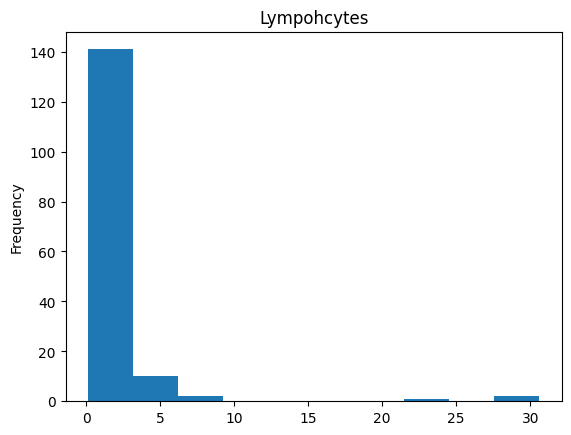

In [32]:
covid_flu['lymphocytes'].plot(
    title='Lympohcytes', kind='hist', xlabel='cells/microLiter'
)

<AxesSubplot: title={'center': 'Lympohcytes (Imputed)'}, ylabel='Frequency'>

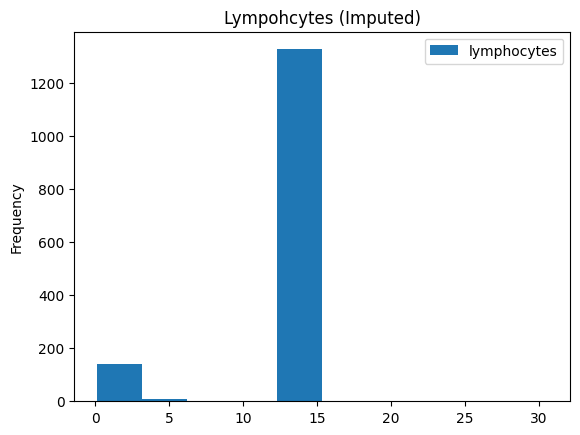

In [35]:
# end of tail imputation

from feature_engine.imputation import EndTailImputer

EndTailImputer().fit_transform(covid_flu[['lymphocytes']]).plot(
    title='Lympohcytes (Imputed)', kind='hist', xlabel='cells/microLiter'
)

In [36]:
# Pandas qualitative types
categorical_types = ['O']
categorical_columns = covid_flu.select_dtypes(include=categorical_types).columns.tolist()
categorical_columns.remove('Diagnosis')  # response variable shouldn't be included
for categorical_column in categorical_columns:
    print('=====')
    print(categorical_column)
    print('=====')
    print(covid_flu[categorical_column].value_counts(dropna=False))

=====
InitialPCRDiagnosis
=====
NaN    1378
Yes     100
No        4
Name: InitialPCRDiagnosis, dtype: int64
=====
Sex
=====
M      748
F      658
NaN     76
Name: Sex, dtype: int64
=====
CReactiveProteinLevels
=====
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: CReactiveProteinLevels, Length: 121, dtype: int64
=====
CTscanResults
=====
NaN    1323
Yes     144
No       15
Name: CTscanResults, dtype: int64
=====
RiskFactors
=====
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                        

In [37]:
# make a Female binary feature instead of M/F sex
covid_flu['Female'] = covid_flu['Sex'] == 'F'
del covid_flu['Sex']

# replace Yes/No with True/False
covid_flu = covid_flu.replace({'Yes': True, 'No': False})

In [38]:
# fill missing categories with False
fill_with_false = SimpleImputer(strategy='constant', fill_value=False)
fill_with_false.fit_transform(covid_flu[binary_features])  # placeholder, not actually running this

NameError: name 'binary_features' is not defined

<AxesSubplot: title={'center': 'Lymphocytes'}, ylabel='Frequency'>

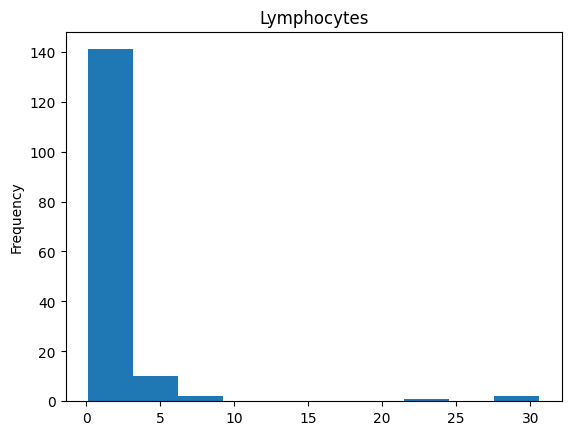

In [39]:
 # log transformations
covid_flu['lymphocytes'].plot(
   title='Lymphocytes', kind='hist', xlabel='cells/microLiter'
)

<AxesSubplot: title={'center': 'Lymphocytes'}, ylabel='Frequency'>

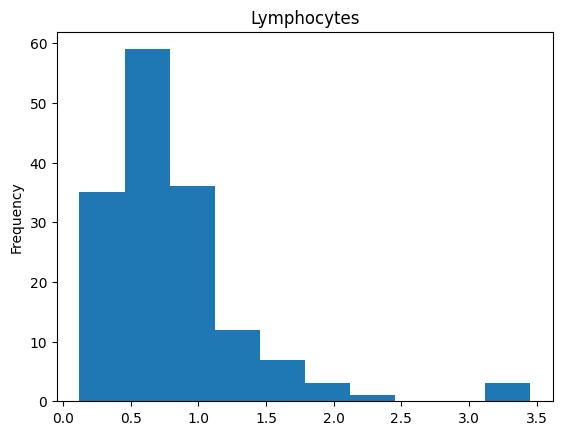

In [40]:
covid_flu['lymphocytes'].map(np.log1p).plot(
  title='Lymphocytes', kind='hist', xlabel='cells/microLiter'
)

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'neutrophil'}>],
       [<AxesSubplot: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <AxesSubplot: title={'center': 'lymphocytes'}>],
       [<AxesSubplot: title={'center': 'DurationOfIllness'}>,
        <AxesSubplot: title={'center': 'Temperature'}>]], dtype=object)

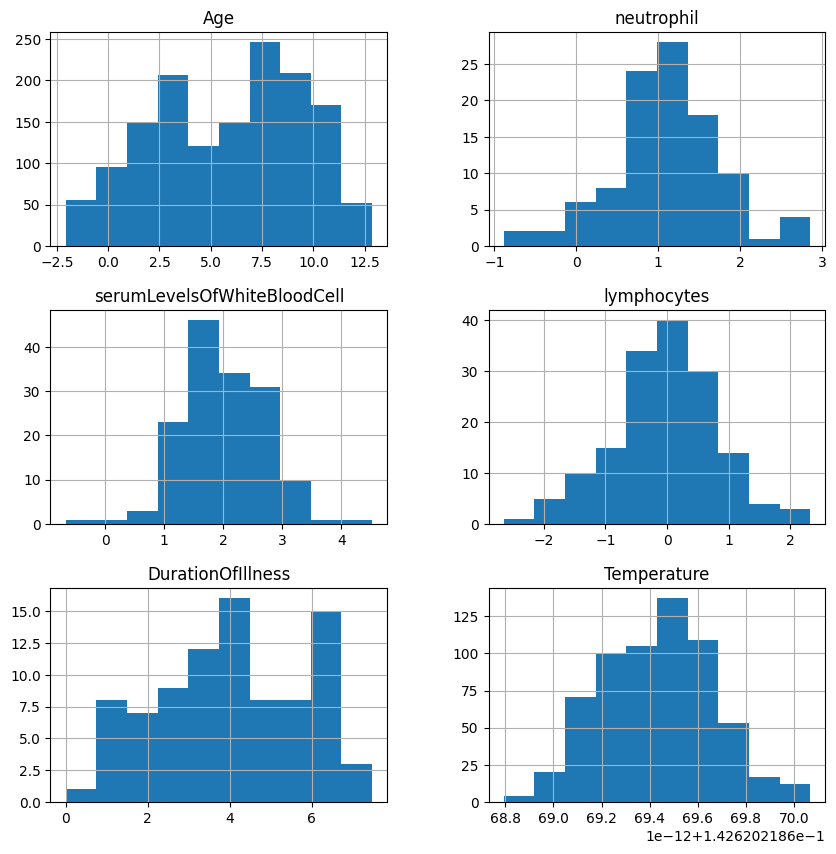

In [41]:
# box cox transformation
# covid_flu[covid_flu['Age']==0].head(3) # there are some zeros
covid_flu['Age'] = covid_flu['Age'] + .01  # make age strictly positive

from sklearn.preprocessing import PowerTransformer
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
pd.DataFrame(
    boxcox_transformer.fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10,10))

In [42]:
boxcox_transformer.lambdas_

array([ 0.41035252, -0.22261792,  0.12473207, -0.24415703,  0.36376996,
       -7.01162857])

In [43]:
covid_flu[numerical_columns].describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.481040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.010000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.010000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.010000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.010000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.010000,93.000000,36.070000,30.600000,37.000000,42.222222


In [44]:
# Z-score standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.DataFrame(  # mean of 0 and std of 1 but ranges are different
    StandardScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1.454000e+03,103.000000,1.510000e+02,1.560000e+02,8.700000e+01,6.280000e+02
mean,1.368308e-16,0.000000,-1.411674e-16,-1.708035e-17,-5.614921e-17,1.708471e-15
std,1.000344e+00,1.004890,1.003328e+00,1.003221e+00,1.005797e+00,1.000797e+00
min,-1.232324e+00,-0.507435,-1.473866e+00,-4.361482e-01,-1.444604e+00,-2.145299e+00
25%,-9.064480e-01,-0.371709,-6.671264e-01,-3.074706e-01,-7.772737e-01,-7.736770e-01
50%,-1.150359e-01,-0.280644,-2.758748e-01,-2.395187e-01,-2.211651e-01,-6.246559e-02
75%,7.229298e-01,-0.016556,5.239403e-01,-6.215921e-02,6.686088e-01,5.979450e-01
max,2.864398e+00,6.821614,6.736646e+00,7.289577e+00,2.559378e+00,3.798396e+00


<AxesSubplot: title={'center': 'Age (Uniform Binning)'}, ylabel='Frequency'>

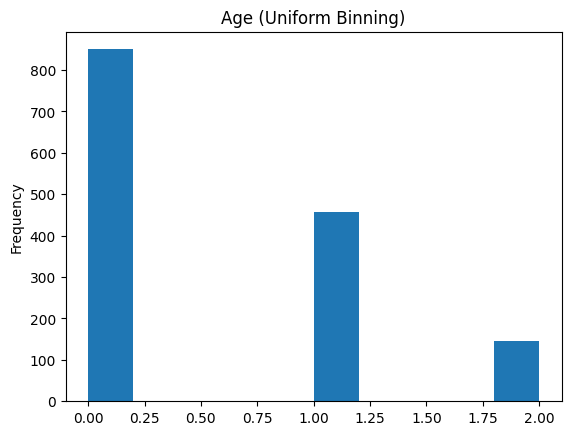

In [45]:
# Binning
from sklearn.preprocessing import KBinsDiscretizer

# uniform bins
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Uniform Binning)', kind='hist', xlabel='Age'
)

<AxesSubplot: >

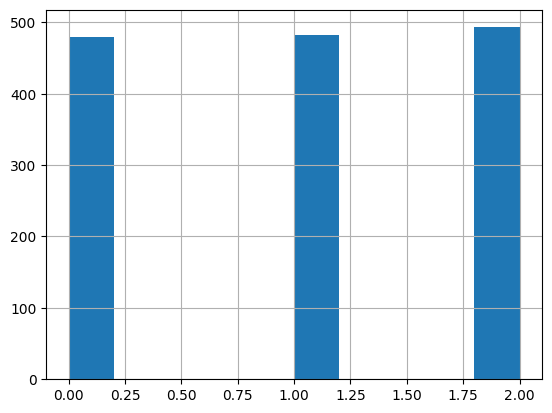

In [46]:
# quantile bins
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).hist()

<AxesSubplot: title={'center': 'Age (Kmeans) Binning)'}, ylabel='Frequency'>

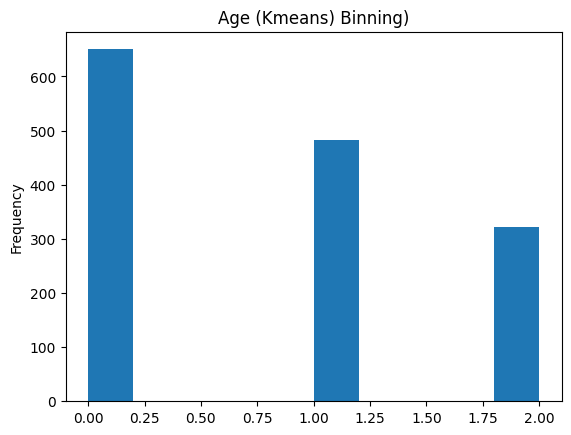

In [47]:
# K-means bins
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Kmeans) Binning)', kind='hist', xlabel='Age'
)

In [48]:
from Transformer_for_Risk_Factors import DummifyRiskFactor

In [49]:
drf = DummifyRiskFactor()
risks = drf.fit_transform(covid_flu['RiskFactors'])
print(risks.shape)

(1482, 41)


In [50]:
pd.DataFrame(risks, columns=drf.label_binarizer.classes_)

,asthma,athero,atopic dermatitis and repetitive respiratory infections,begin tumor (removed),chronic,chronic endrocrine disorder,chronic liver dieseas,chronic liver disorder,chronic neurological disorders,chronic obstructive pulmonary disease,...,lung disease,myxoma of abdominal cavity,obesity,pneumomediastinum and subcutaneous emphysema,pneumonia,pre-eclampsia,prom,renal disease,respiratory disease,rheumatoid arthritis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
flu_symptoms = [
    'Diarrhea', 'Fever', 'Coughing', 'SoreThroat',
    'NauseaVomitting', 'Fatigue'
]
covid_flu['FluSymptoms'] = covid_flu[flu_symptoms].sum(axis=1) >= 2

print(covid_flu['FluSymptoms'].value_counts())

False    753
True     729
Name: FluSymptoms, dtype: int64


In [52]:
covid_flu[flu_symptoms].head()

,Diarrhea,Fever,Coughing,SoreThroat,NauseaVomitting,Fatigue
0,NaN,True,True,False,NaN,False
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,True,True,False,NaN,True
4,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
covid_flu['FluSymptoms'].isnull().sum()

0

In [57]:
binary_features = [
    'Female', 'GroundGlassOpacity', 'CTscanResults',
    'Diarrhea', 'Fever', 'FluSymptoms', 'Coughing',
    'SoreThroat', 'NauseaVomitting', 'Fatigue', 'InitialPCRDiagnosis'
]